In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('./data/churn.csv')

In [27]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                50000 non-null  float64
 1   avg_rating_by_driver    49799 non-null  float64
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   city                    50000 non-null  object 
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   signup_date             50000 non-null  object 
 8   surge_pct               50000 non-null  float64
 9   trips_in_first_30_days  50000 non-null  int64  
 10  luxury_car_user         50000 non-null  bool   
 11  weekday_pct             50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [21]:
df.dropna(subset=['avg_rating_by_driver', 'avg_rating_of_driver'], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                41744 non-null  float64
 1   avg_rating_by_driver    41744 non-null  float64
 2   avg_rating_of_driver    41744 non-null  float64
 3   avg_surge               41744 non-null  float64
 4   city                    41744 non-null  object 
 5   last_trip_date          41744 non-null  object 
 6   phone                   41445 non-null  object 
 7   signup_date             41744 non-null  object 
 8   surge_pct               41744 non-null  float64
 9   trips_in_first_30_days  41744 non-null  int64  
 10  luxury_car_user         41744 non-null  bool   
 11  weekday_pct             41744 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.9+ MB


In [24]:
def drop_nan_ratings(df):
    df.dropna(subset=['avg_rating_by_driver', 'avg_rating_of_driver'], inplace=True)

In [25]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,5.465312,4.776648,4.601801,1.073697,8.884695,2.611393,61.304437
std,5.149810,0.404109,0.616079,0.198681,18.309042,4.060121,34.799944
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.790000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [35]:
df.dropna(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                41445 non-null  float64
 1   avg_rating_by_driver    41445 non-null  float64
 2   avg_rating_of_driver    41445 non-null  float64
 3   avg_surge               41445 non-null  float64
 4   city                    41445 non-null  object 
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   signup_date             41445 non-null  object 
 8   surge_pct               41445 non-null  float64
 9   trips_in_first_30_days  41445 non-null  int64  
 10  luxury_car_user         41445 non-null  bool   
 11  weekday_pct             41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


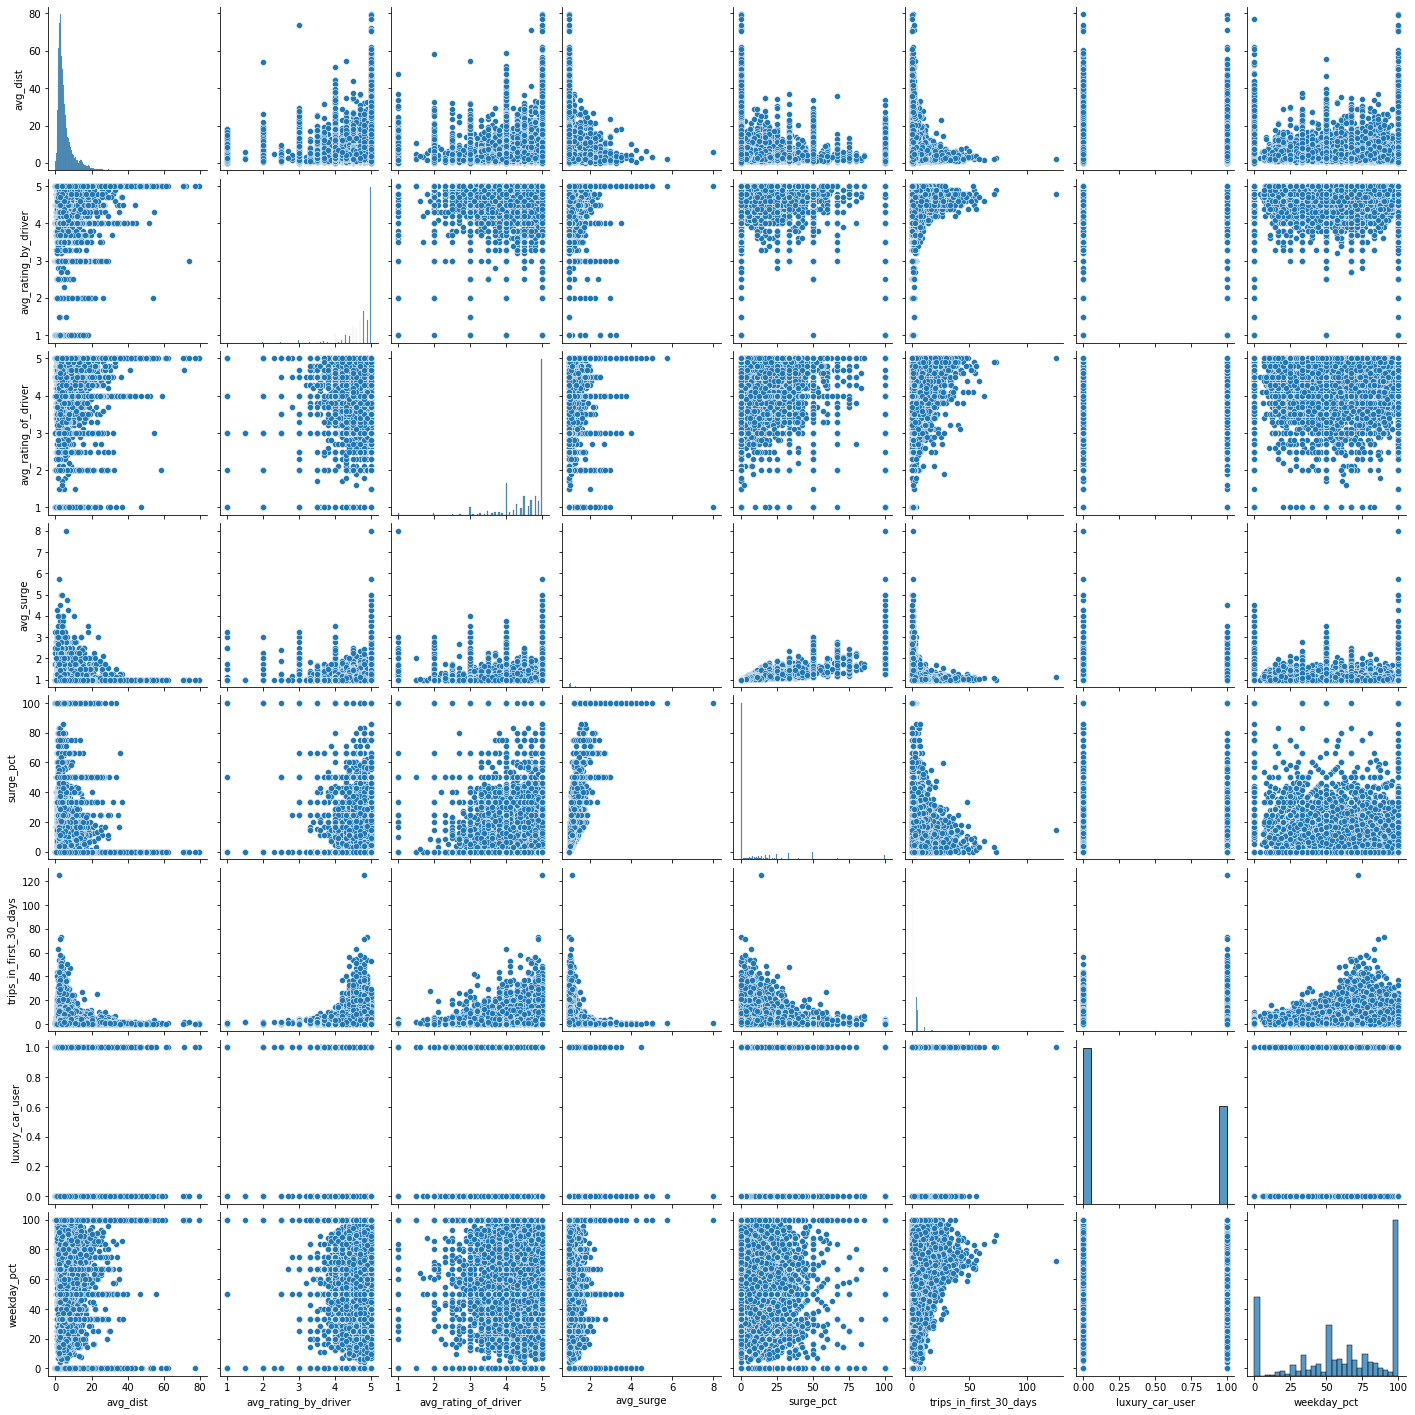

In [37]:
sns.pairplot(df)

In [38]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [39]:
df = pd.read_csv('./data/churn.csv')

In [40]:
df.dropna(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                41445 non-null  float64
 1   avg_rating_by_driver    41445 non-null  float64
 2   avg_rating_of_driver    41445 non-null  float64
 3   avg_surge               41445 non-null  float64
 4   city                    41445 non-null  object 
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   signup_date             41445 non-null  object 
 8   surge_pct               41445 non-null  float64
 9   trips_in_first_30_days  41445 non-null  int64  
 10  luxury_car_user         41445 non-null  bool   
 11  weekday_pct             41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [42]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [49]:
df = pd.read_csv('./data/churn_clean (1).csv', index_col = 0)

In [50]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.0,Astapor,2014-05-03,1.0,2014-01-12,0.0,0,0,100.0,1
1,8.06,5.0,5.0,1.0,Astapor,2014-01-26,1.0,2014-01-25,0.0,2,1,0.0,1
6,4.87,4.7,4.0,1.0,Astapor,2014-04-21,1.0,2014-01-18,0.0,0,0,66.7,1
7,1.78,4.0,5.0,1.0,Winterfell,2014-01-12,0.0,2014-01-11,0.0,3,0,0.0,1
8,6.87,5.0,4.7,1.0,Astapor,2014-01-30,1.0,2014-01-01,0.0,3,0,66.7,1


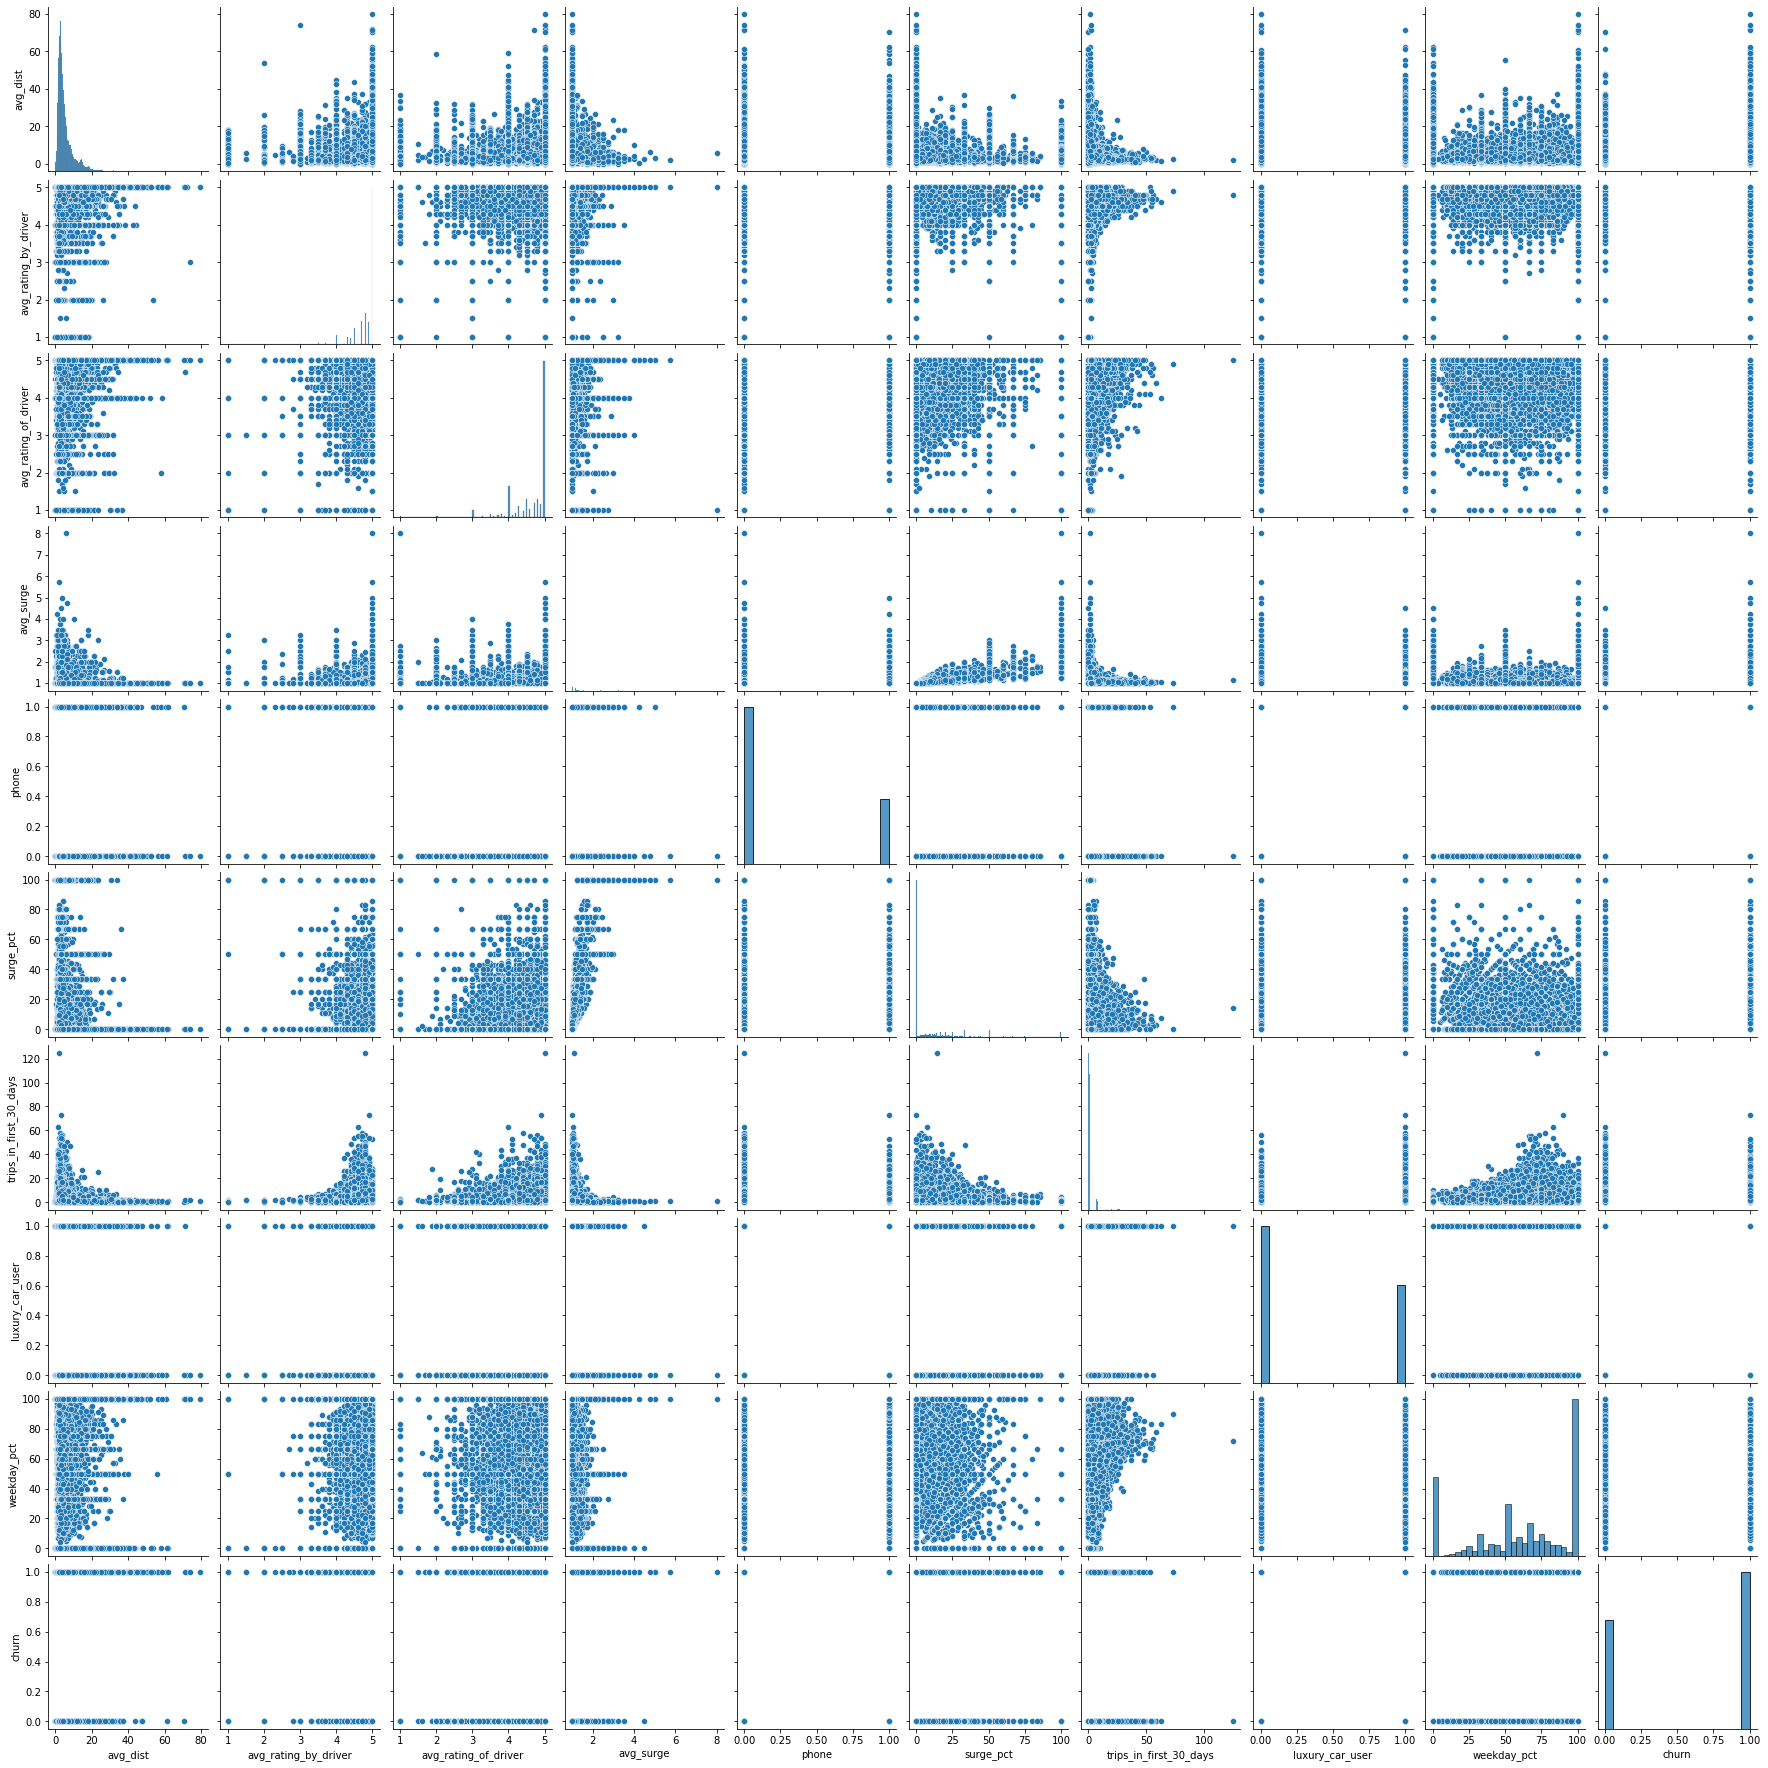

In [51]:
sns.pairplot(df)

In [1]:
from clean import *

In [2]:
#     test_file = 'data/churn_train.csv'
file = (input("Enter path of filename: "))
df = pd.read_csv(file)
df = to_date(df)
df = create_churn_col(df, 'last_trip_date', '2014-06-01')
df = bool_to_int(df, ['churn', 'luxury_car_user'])
df = hot_encode(df)
df = drop_nan_ratings(df)
df.to_csv('data/churn_clean.csv')

Enter path of filename:  ./data/churn_train.csv


In [3]:
df = pd.read_csv('./data/churn_clean.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33132 entries, 0 to 33131
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              33132 non-null  int64  
 1   avg_dist                33132 non-null  float64
 2   avg_rating_by_driver    33132 non-null  float64
 3   avg_rating_of_driver    33132 non-null  float64
 4   avg_surge               33132 non-null  float64
 5   city                    33132 non-null  object 
 6   last_trip_date          33132 non-null  object 
 7   phone                   33132 non-null  float64
 8   signup_date             33132 non-null  object 
 9   surge_pct               33132 non-null  float64
 10  trips_in_first_30_days  33132 non-null  int64  
 11  luxury_car_user         33132 non-null  int64  
 12  weekday_pct             33132 non-null  float64
 13  churn                   33132 non-null  int64  
dtypes: float64(7), int64(4), object(3)
mem

In [109]:
from clean import *

In [110]:
file = (input("Enter path of filename: "))
df = pd.read_csv(file)
df = to_date(df)
df = create_churn_col(df, 'last_trip_date', '2014-06-01')
df = bool_to_int(df, ['churn', 'luxury_car_user'])
df = hot_encode(df)
df = drop_nan_ratings(df)
df.to_csv('data/churn_clean.csv')

Enter path of filename:  ./data/churn_train.csv


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33132 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                33132 non-null  float64       
 1   avg_rating_by_driver    33132 non-null  float64       
 2   avg_rating_of_driver    33132 non-null  float64       
 3   avg_surge               33132 non-null  float64       
 4   city                    33132 non-null  object        
 5   last_trip_date          33132 non-null  datetime64[ns]
 6   phone                   33132 non-null  float64       
 7   signup_date             33132 non-null  datetime64[ns]
 8   surge_pct               33132 non-null  float64       
 9   trips_in_first_30_days  33132 non-null  int64         
 10  luxury_car_user         33132 non-null  int64         
 11  weekday_pct             33132 non-null  float64       
 12  churn                   33132 non-null  int64 

In [112]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
# from roc import plot_roc
plt.style.use('ggplot')

In [27]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,1.0,2014-01-12,0.0,0,0,100.0,1
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,1.0,2014-01-25,0.0,2,1,0.0,1
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,1.0,2014-01-18,0.0,0,0,66.7,1
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,0.0,2014-01-11,0.0,3,0,0.0,1
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,1.0,2014-01-01,0.0,3,0,66.7,1
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,0.0,2014-01-28,0.0,1,0,100.0,1
12,5.42,4.7,5.0,1.00,Astapor,2014-06-28,0.0,2014-01-05,0.0,2,1,33.3,0
13,5.02,5.0,5.0,1.00,Astapor,2014-01-19,1.0,2014-01-19,0.0,1,0,0.0,1
14,4.28,5.0,4.0,1.15,Winterfell,2014-06-28,1.0,2014-01-14,20.0,2,0,40.0,0
15,3.40,5.0,5.0,1.00,Astapor,2014-01-16,1.0,2014-01-16,0.0,1,1,100.0,1


In [113]:
df.drop(['city', 'last_trip_date', 'signup_date'], axis=1, inplace=True)

In [29]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.0,1.0,0.0,0,0,100.0,1
1,8.06,5.0,5.0,1.0,1.0,0.0,2,1,0.0,1
6,4.87,4.7,4.0,1.0,1.0,0.0,0,0,66.7,1
7,1.78,4.0,5.0,1.0,0.0,0.0,3,0,0.0,1
8,6.87,5.0,4.7,1.0,1.0,0.0,3,0,66.7,1


In [114]:
y = df.pop('churn').values

In [115]:
X = df.values

In [116]:
print(X)

[[  6.94   5.     5.   ...   0.     0.   100.  ]
 [  8.06   5.     5.   ...   2.     1.     0.  ]
 [  4.87   4.7    4.   ...   0.     0.    66.7 ]
 ...
 [  3.04   5.     5.   ...   3.     1.    33.3 ]
 [  3.49   4.3    3.3  ...   5.     0.    60.  ]
 [  4.25   4.7    5.   ...   2.     1.    42.9 ]]


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [118]:
rf = RandomForestClassifier(random_state=42)

In [119]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [120]:
print("score:", rf.score(X_test, y_test))

score: 0.7244959555716528


In [37]:
rf_250 = RandomForestClassifier(n_estimators=250, random_state=42)

In [38]:
rf_250.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

In [39]:
rf_250.fit(X_train,y_train)
print("score:", rf_250.score(X_test, y_test))

score: 0.7255825184112037


In [40]:
importances = rf.feature_importances_

In [41]:
print(importances)

[0.32267053 0.12777859 0.08074526 0.07390668 0.0386728  0.08673458
 0.08432582 0.03279116 0.15237459]


In [42]:
cols = df.columns.tolist()

In [43]:
print(cols)

['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'phone', 'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct']


In [44]:
d = {}
count = 0
for i in cols:
    d[i] = importances[count]
    count += 1

In [45]:
d

{'avg_dist': 0.3226705250006426,
 'avg_rating_by_driver': 0.12777858653173707,
 'avg_rating_of_driver': 0.08074525554612444,
 'avg_surge': 0.07390667805699165,
 'phone': 0.03867279694598338,
 'surge_pct': 0.08673457885888383,
 'trips_in_first_30_days': 0.08432582404110162,
 'luxury_car_user': 0.03279116223215071,
 'weekday_pct': 0.15237459278638482}

In [46]:
sorted(d.values())

[0.03279116223215071,
 0.03867279694598338,
 0.07390667805699165,
 0.08074525554612444,
 0.08432582404110162,
 0.08673457885888383,
 0.12777858653173707,
 0.15237459278638482,
 0.3226705250006426]

In [101]:
from datetime import date, timedelta

In [102]:
start = date(2014,1,1)

In [110]:
result = (date(2014,1,31) - start).days

In [111]:
result

30

In [112]:
type(result)

int

In [113]:
from clean import *

In [116]:
file = (input("Enter path of filename: "))
df_date = pd.read_csv(file)
df_date = to_date(df_date)
df_date = create_churn_col(df_date, 'last_trip_date', '2014-06-01')
df_date = bool_to_int(df_date, ['churn', 'luxury_car_user'])
df_date = hot_encode(df_date)
df_date = drop_nan_ratings(df_date)
df_date.to_csv('data/churn_clean_date.csv')

Enter path of filename:  ./data/churn_train.csv


In [117]:
df_date.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.0,Astapor,2014-05-03,1.0,2014-01-12,0.0,0,0,100.0,1
1,8.06,5.0,5.0,1.0,Astapor,2014-01-26,1.0,2014-01-25,0.0,2,1,0.0,1
6,4.87,4.7,4.0,1.0,Astapor,2014-04-21,1.0,2014-01-18,0.0,0,0,66.7,1
7,1.78,4.0,5.0,1.0,Winterfell,2014-01-12,0.0,2014-01-11,0.0,3,0,0.0,1
8,6.87,5.0,4.7,1.0,Astapor,2014-01-30,1.0,2014-01-01,0.0,3,0,66.7,1


In [121]:
df_date['last_trip_date'] = df_date.assign(Delta = lambda x: (x(date(['last_trip_date']) - start).days))

TypeError: an integer is required (got type list)

In [47]:
feature_importances = np.argsort(rf.feature_importances_)
print("\n12: top five:", list(df.columns[feature_importances[-1:-6:-1]]))


12: top five: ['avg_dist', 'weekday_pct', 'avg_rating_by_driver', 'surge_pct', 'trips_in_first_30_days']



13. Feature ranking:
1. avg_dist (0.322671)
2. weekday_pct (0.152375)
3. avg_rating_by_driver (0.127779)
4. surge_pct (0.086735)
5. trips_in_first_30_days (0.084326)
6. avg_rating_of_driver (0.080745)
7. avg_surge (0.073907)
8. phone (0.038673)
9. luxury_car_user (0.032791)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

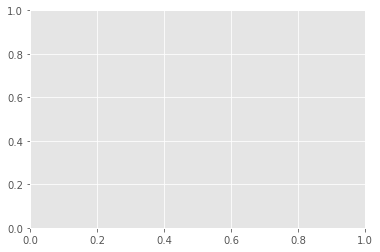

In [48]:
n = 9 # top 10 features

#importances = forest_fit.feature_importances_[:n]
importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(df.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()

ax.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("importance")
ax.set_title("Feature Importances")

In [124]:
pprint(rf.get_params())

Pretty printing has been turned OFF


In [49]:
from pprint import pprint

In [50]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [128]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_new = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_new, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [53]:
rf_max_depth = RandomForestClassifier(max_depth = 5, random_state=42)

In [54]:
rf_max_depth.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [55]:
print("score:", rf_max_depth.score(X_test, y_test))

score: 0.7426053362308342


In [57]:
rf_max_depth = RandomForestClassifier(max_depth = 10, random_state=42)
rf_max_depth.fit(X_train,y_train)
print("Accuracy Score:", rf_max_depth.score(X_test, y_test))

Accuracy Score: 0.7563684655318121


In [58]:
rf_max_depth = RandomForestClassifier(max_depth = 20, random_state=42)
rf_max_depth.fit(X_train,y_train)
print("Accuracy Score:", rf_max_depth.score(X_test, y_test))

Accuracy Score: 0.7323433538572981


In [59]:
rf_max_depth = RandomForestClassifier(max_depth = 15, random_state=42)
rf_max_depth.fit(X_train,y_train)
print("Accuracy Score:", rf_max_depth.score(X_test, y_test))

Accuracy Score: 0.7496076300857177


In [125]:
def plot_importances(model, top_n):
    '''
    Plots the impurity-based feature importances of the forest
    Parameters:
        model: (var): the random forest model instantiated 
        top_n: (int) how many importances do we want to look at
    Returns:
        a bar graph of the feature importances using a random forest model
    '''
    n = top_n 
    importances = model.feature_importances_[:n]
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
    indices = np.argsort(importances)[::-1]
    features = list(df.columns[indices])
    fig, ax = plt.subplots(figsize=(10,6))
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = 300

    ax.bar(range(9), importances[indices], yerr=std[indices], color="r", align="center")
    ax.set_xticks(range(top_n))
    ax.set_ylabel("Ratio of Importance")
    ax.set_xticklabels(features, rotation = 70)
    ax.set_xlim([-1, 10]) #this might need to be adjusted according to top_n
    ax.set_xlabel("Importance")
    ax.set_title("Feature Importances for Random Forest")

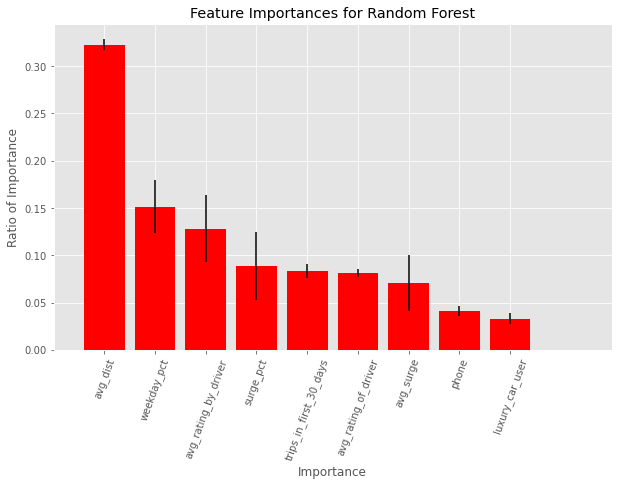

In [126]:
plot_importances(rf, 9)

In [87]:
rf_max_depth = RandomForestClassifier(max_depth = 15, random_state=42)
rf_max_depth.fit(X_train,y_train)
print("Accuracy Score:", rf_max_depth.score(X_test, y_test))

Accuracy Score: 0.7496076300857177


Text(0.5, 1.0, 'Accuracy vs Num Trees')

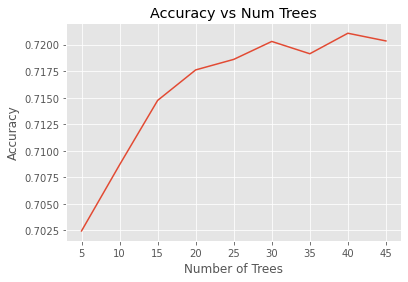

In [89]:
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Trees')

In [90]:
num_trees = range(5, 200, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Trees')

KeyboardInterrupt: 

In [94]:
max_depth = 15

accuracies = []
for n in max_depth:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 10)
fig, ax = plt.subplots()
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Trees')

TypeError: 'int' object is not iterable

In [101]:
rf_250 = RandomForestClassifier(n_estimators=250, max_depth = 10, random_state=42)
rf_250.fit(X_train,y_train)
print("Accuracy Score:", rf_250.score(X_test, y_test))

Accuracy Score: 0.7557648195098394


In [102]:
rf_250 = RandomForestClassifier(n_estimators=250, max_depth = 10, min_samples_split = 2, random_state=42)
rf_250.fit(X_train,y_train)
print("Accuracy Score:", rf_250.score(X_test, y_test))

Accuracy Score: 0.7557648195098394


In [103]:
rf_250 = RandomForestClassifier(n_estimators=250, max_depth = 10, min_samples_split = 5, random_state=42)
rf_250.fit(X_train,y_train)
print("Accuracy Score:", rf_250.score(X_test, y_test))

Accuracy Score: 0.7573342991669685
